# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

## Tensorflow Programming Model

> - Deep Learning Framework Power Scores 2018
> - Link : https://towardsdatascience.com/deep-learning-framework-power-scores-2018-23607ddf297a

In [1]:
from images import bigpycraft_dl as bpc
from IPython.display import Image 

### <font color='brown'>Popularity</font>

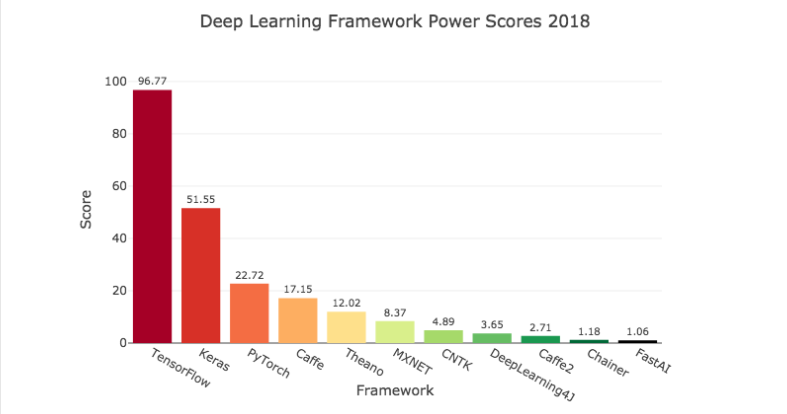

In [2]:
Image(bpc.DL02_IMG_01)

### <font color='brown'>TensorFlow 2.x</font>

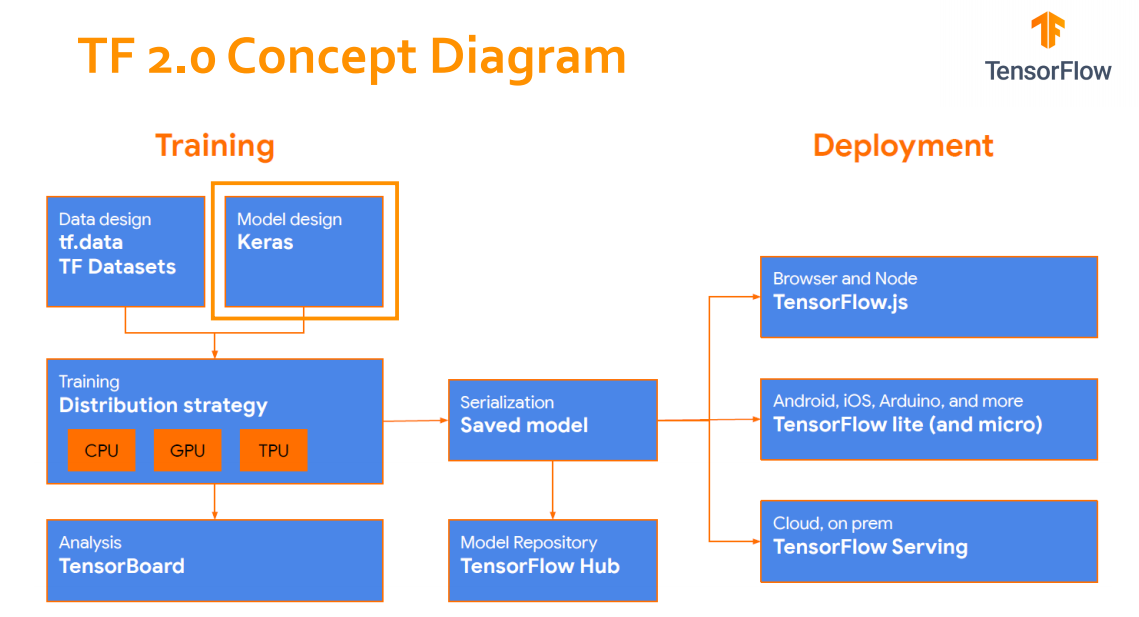

In [3]:
Image(bpc.DL02_IMG_02)

### <font color='brown'>TF1 vs TF2</font>

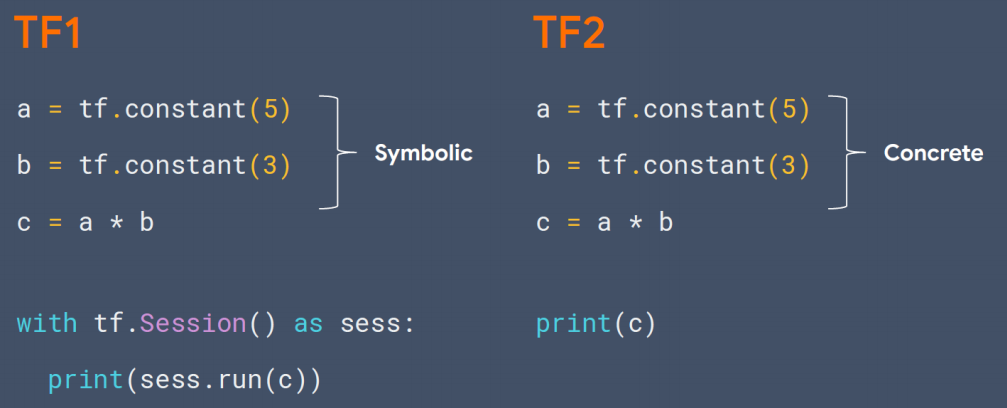

In [4]:
# TF1 vs TF2
Image(bpc.DL02_IMG_03)

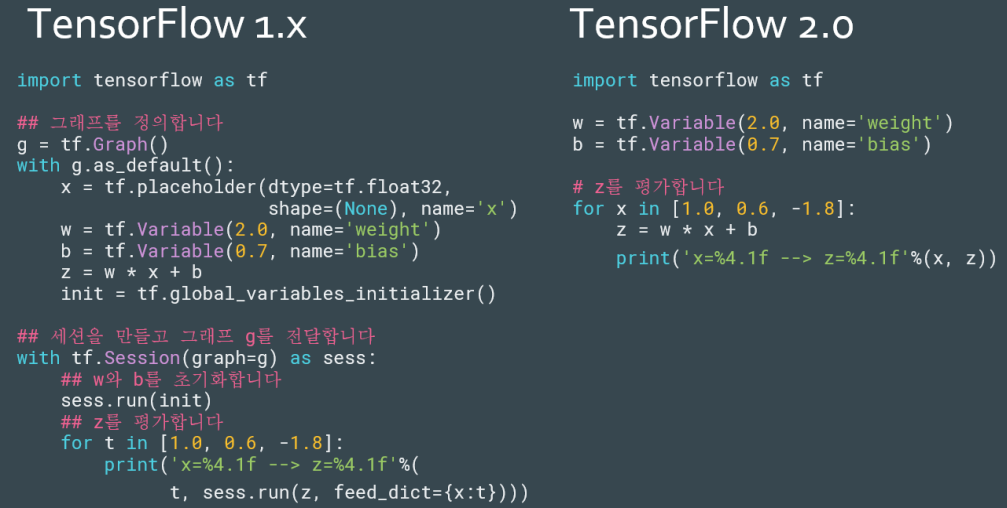

In [5]:
Image(bpc.DL02_IMG_04)

### <font color='brown'>AutoGraph</font>
> 
> - TF2로 업그레이드 되면서 코드는 간단해졌지만, 속도는 늦어졌다.
> - @tf.function Decorator를 통해 속도를 개선

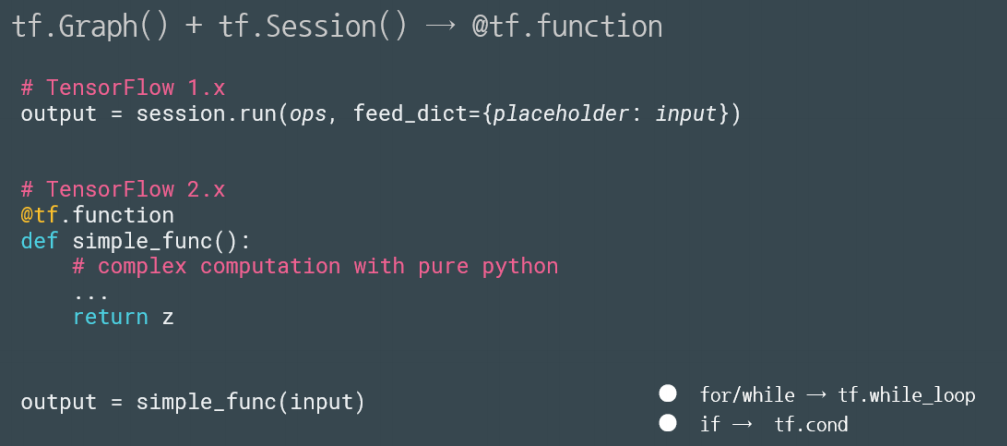

In [6]:
Image(bpc.DL02_IMG_05)

### <font color='brown'>Sequential API</font>
> - 기존 keras는 다른 FrameWork도 지원해줬지만, 지금은 TensorFlow만 지원해준다.

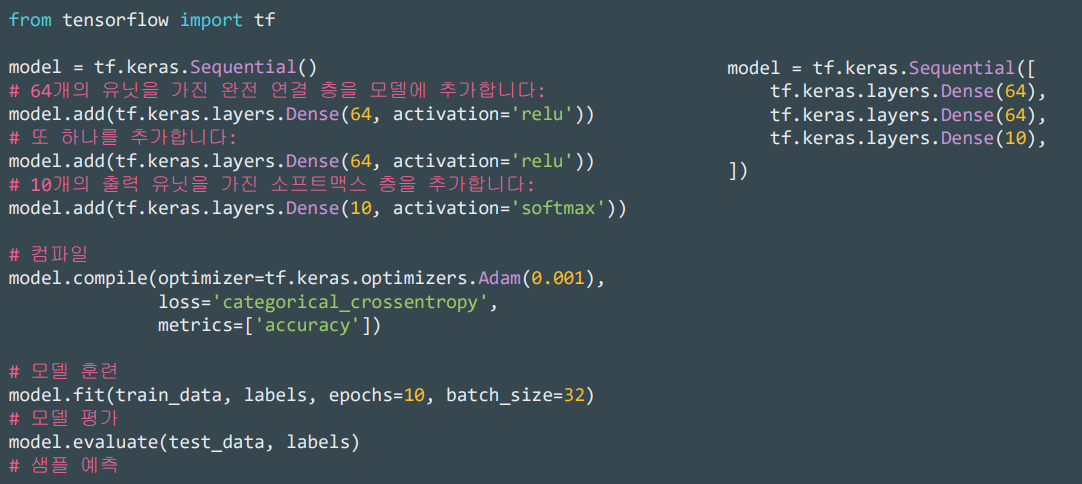

In [7]:
Image(bpc.DL02_IMG_06)

### <font color='brown'>Functional API</font>

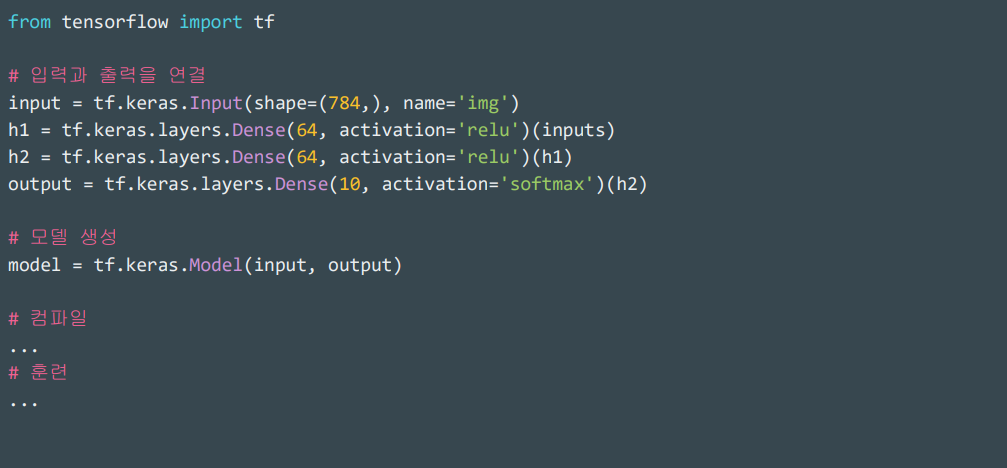

In [8]:
Image(bpc.DL02_IMG_07)

## <font color='brown'>TensorFlow_Basics_1.x</font>

In [9]:
import numpy as np
import tensorflow as tf
### <font color='brown'>Functional API</font>

In [10]:
from tqdm.notebook import tqdm
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Defining Tensors

In [11]:
m1 = [[1.0, 2.0], 
      [3.0, 4.0]]
m2 = np.array([[1.0, 2.0],
              [3.0, 4.0]], dtype=np.float32)
m3 = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])

In [12]:
print(type(m1))
print(type(m2))
print(type(m3))

<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.Tensor'>


In [13]:
t1 = tf.convert_to_tensor(m1, dtype=tf.float32)
t2 = tf.convert_to_tensor(m2, dtype=tf.float32)
t3 = tf.convert_to_tensor(m3, dtype=tf.float32)

In [14]:
print(type(t1))
print(type(t2))
print(type(t3))

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


In [15]:
sess = tf.Session()
print ("OPEN SESSION")

OPEN SESSION


In [16]:
def print_tf(x):
    # print("TYPE IS\n %s" % (type(x)))
    # print("VALUE IS\n %s" % (x))
    print(" - TYPE  : {}".format(type(x)))
    print(" - VALUE : {}".format(x))

### Constants

In [17]:
hello = tf.constant("Hello World!")
print(hello)
print_tf(hello)

Tensor("Const_3:0", shape=(), dtype=string)
 - TYPE  : <class 'tensorflow.python.framework.ops.Tensor'>
 - VALUE : Tensor("Const_3:0", shape=(), dtype=string)


In [18]:
hello_out = sess.run(hello)
print_tf(hello_out)

 - TYPE  : <class 'bytes'>
 - VALUE : b'Hello World!'


In [19]:
a = tf.constant(1.5)
b = tf.constant(2.5)
print_tf(a)
print_tf(b)

 - TYPE  : <class 'tensorflow.python.framework.ops.Tensor'>
 - VALUE : Tensor("Const_4:0", shape=(), dtype=float32)
 - TYPE  : <class 'tensorflow.python.framework.ops.Tensor'>
 - VALUE : Tensor("Const_5:0", shape=(), dtype=float32)


In [20]:
a_out = sess.run(a)
b_out = sess.run(b)
print_tf(a_out)
print_tf(b_out)

 - TYPE  : <class 'numpy.float32'>
 - VALUE : 1.5
 - TYPE  : <class 'numpy.float32'>
 - VALUE : 2.5


### Operations

In [21]:
a_plus_b = tf.add(a, b)
print_tf(a_plus_b)

 - TYPE  : <class 'tensorflow.python.framework.ops.Tensor'>
 - VALUE : Tensor("Add:0", shape=(), dtype=float32)


In [22]:
a_plus_b_out = sess.run(a_plus_b)
print_tf(a_plus_b_out)

 - TYPE  : <class 'numpy.float32'>
 - VALUE : 4.0


In [23]:
a_mul_b = tf.multiply(a, b)
a_mul_b_out = sess.run(a_mul_b)
print_tf(a_mul_b_out)

 - TYPE  : <class 'numpy.float32'>
 - VALUE : 3.75


### Variables

In [24]:
weight = tf.Variable(tf.random_normal([5, 2], stddev=0.1))
print_tf(weight)

 - TYPE  : <class 'tensorflow.python.ops.variables.RefVariable'>
 - VALUE : <tf.Variable 'Variable:0' shape=(5, 2) dtype=float32_ref>


In [25]:
# weight_out = sess.run(weight)
# print_tf(weight_out)

In [26]:
try:
    weight_out = sess.run(weight)
    print_tf(weight_out)
except Exception as err:
    print(err.with_traceback)
    print(err)


<built-in method with_traceback of FailedPreconditionError object at 0x000002101B21CC40>
Graph execution error:

Attempting to use uninitialized value Variable
	 [[{{node _retval_Variable_0_0}}]]


In [27]:
sess.run(weight.initializer)

In [28]:
weight_out = sess.run(weight)
print_tf(weight_out)

 - TYPE  : <class 'numpy.ndarray'>
 - VALUE : [[-0.20013414 -0.19427964]
 [ 0.03576358 -0.04372264]
 [ 0.10329719 -0.3291951 ]
 [-0.03494957  0.10584631]
 [ 0.12538192 -0.09567165]]


In [29]:
weight2 = tf.Variable(tf.random_normal([5, 2], stddev=0.1))
weight3 = tf.Variable(tf.random_normal([5, 2], stddev=0.1))
print_tf(weight2)
print_tf(weight3)

 - TYPE  : <class 'tensorflow.python.ops.variables.RefVariable'>
 - VALUE : <tf.Variable 'Variable_1:0' shape=(5, 2) dtype=float32_ref>
 - TYPE  : <class 'tensorflow.python.ops.variables.RefVariable'>
 - VALUE : <tf.Variable 'Variable_2:0' shape=(5, 2) dtype=float32_ref>


In [30]:
init = tf.global_variables_initializer()
sess.run(init)

In [31]:
weight_out2 = sess.run(weight2)
weight_out3 = sess.run(weight3)
print_tf(weight_out2)
print_tf(weight_out3)

 - TYPE  : <class 'numpy.ndarray'>
 - VALUE : [[-0.04780782  0.24828318]
 [ 0.10054807  0.06058706]
 [-0.10075089  0.13424127]
 [-0.06313377  0.07173597]
 [-0.04615501 -0.07075538]]
 - TYPE  : <class 'numpy.ndarray'>
 - VALUE : [[-0.0281223   0.03235992]
 [ 0.11783905 -0.02906889]
 [ 0.10903581 -0.07280674]
 [ 0.02004661  0.06989288]
 [ 0.07996798 -0.00795697]]


In [32]:
s = tf.Variable(2, name='scalar') 
m = tf.Variable([[0, 1], [2, 3]], name='matrix') 
W = tf.Variable(tf.zeros([784,10]), name='big_matrix')
V = tf.Variable(tf.truncated_normal([784, 10]), name='normal_matrix')

s = tf.get_variable('scalar', initializer=tf.constant(2)) 
m = tf.get_variable('matrix', initializer=tf.constant([[0, 1], [2, 3]]))
W = tf.get_variable('big_matrix', shape=(784, 10), initializer=tf.zeros_initializer())
V = tf.get_variable('normal_matrix', shape=(784, 10), initializer=tf.truncated_normal_initializer())

with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    print(V.eval())

[[ 8.5140687e-01  3.5878396e-01 -8.6424094e-01 ...  1.6137157e-01
   6.8917751e-01  3.5376117e-01]
 [ 1.3748534e+00 -5.7814652e-01 -5.4954976e-01 ...  9.6750456e-01
   4.2844966e-01 -6.2400693e-01]
 [-5.1928270e-01 -4.1094226e-01  1.3913813e+00 ... -4.2981142e-01
  -1.9301878e-01 -8.3410218e-03]
 ...
 [-1.0497501e+00  3.0560890e-01  1.6652596e+00 ... -5.9960421e-02
  -5.0308611e-02 -1.6466058e-04]
 [ 4.6531511e-03 -7.4937624e-01 -1.3414249e+00 ... -1.0961174e+00
   9.9980727e-02  7.0352739e-01]
 [-4.9605665e-01 -2.0595416e-01 -7.6355416e-01 ... -2.9635227e-01
  -1.0688055e-01 -1.6293974e+00]]


### Placeholders

In [33]:
x = tf.placeholder(tf.float32, [None, 5])
print_tf(x)

 - TYPE  : <class 'tensorflow.python.framework.ops.Tensor'>
 - VALUE : Tensor("Placeholder:0", shape=(?, 5), dtype=float32)


In [34]:
oper = tf.matmul(x, weight)
print_tf(oper)

 - TYPE  : <class 'tensorflow.python.framework.ops.Tensor'>
 - VALUE : Tensor("MatMul:0", shape=(?, 2), dtype=float32)


In [35]:
# sess = tf.Session()
data = np.random.rand(1, 5)
oper_out = sess.run(oper, feed_dict={x: data})
print_tf(oper_out)

 - TYPE  : <class 'numpy.ndarray'>
 - VALUE : [[-0.12571055  0.05584374]]


In [36]:
data = np.random.rand(2, 5)
oper_out = sess.run(oper, feed_dict={x: data})
print_tf(oper_out)

 - TYPE  : <class 'numpy.ndarray'>
 - VALUE : [[ 0.004714    0.10679446]
 [ 0.0826152  -0.03626795]]


In [37]:
sess.close()

In [38]:
%whos

Variable       Type           Data/Info
---------------------------------------
Image          type           <class 'IPython.core.display.Image'>
V              RefVariable    <tf.Variable 'normal_matr<...>4, 10) dtype=float32_ref>
W              RefVariable    <tf.Variable 'big_matrix_<...>4, 10) dtype=float32_ref>
a              Tensor         Tensor("Const_4:0", shape=(), dtype=float32)
a_mul_b        Tensor         Tensor("Mul:0", shape=(), dtype=float32)
a_mul_b_out    float32        3.75
a_out          float32        1.5
a_plus_b       Tensor         Tensor("Add:0", shape=(), dtype=float32)
a_plus_b_out   float32        4.0
b              Tensor         Tensor("Const_5:0", shape=(), dtype=float32)
b_out          float32        2.5
bpc            module         <module 'images.bigpycraf<...>mages\\bigpycraft_dl.py'>
data           ndarray        2x5: 10 elems, type `float64`, 80 bytes
hello          Tensor         Tensor("Const_3:0", shape=(), dtype=string)
hello_out      bytes  

In [39]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [40]:
%whos

Interactive namespace is empty.


In [41]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
      pass
    
import tensorflow as tf

## <font color='brown'>TensorFlow_Basics_2.x</font>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

In [3]:
tf.executing_eagerly()

True

### Defining Tensors

In [4]:
m1 = [[1.0, 2.0], 
      [3.0, 4.0]]
m2 = np.array([[1.0, 2.0],
              [3.0, 4.0]], dtype=np.float32)
m3 = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])

In [5]:
print(type(m1))
print(type(m2))
print(type(m3))

<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [6]:
t1 = tf.convert_to_tensor(m1, dtype=tf.float32)
t2 = tf.convert_to_tensor(m2, dtype=tf.float32)
t3 = tf.convert_to_tensor(m3, dtype=tf.float32)

In [7]:
print(type(t1))
print(type(t2))
print(type(t3))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [8]:
print(t1)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


### Numpy Compatibility

In [9]:
ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

ndarray

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Constants

In [10]:
hello = tf.constant("Hello World!")
print(hello)

tf.Tensor(b'Hello World!', shape=(), dtype=string)


In [11]:
a = tf.constant(1.5)
b = tf.constant(2.5)
print(a.numpy())
print(b)

1.5
tf.Tensor(2.5, shape=(), dtype=float32)


### Operations

In [12]:
a_plus_b = tf.add(a, b)
print(a_plus_b)

tf.Tensor(4.0, shape=(), dtype=float32)


In [13]:
a_mul_b = tf.multiply(a, b)
print(a_mul_b)

tf.Tensor(3.75, shape=(), dtype=float32)


### Variables

In [14]:
weight = tf.Variable(tf.random_normal_initializer(stddev=0.1)([5, 2]))
print(weight)

<tf.Variable 'Variable:0' shape=(5, 2) dtype=float32, numpy=
array([[-0.08733341, -0.15138859],
       [ 0.05676509, -0.02735746],
       [ 0.12591445, -0.07416172],
       [-0.08610045, -0.00562583],
       [ 0.16697237, -0.11195379]], dtype=float32)>


### Create a Dataset

In [15]:
a = np.arange(10)
print(a)
ds_tensors = tf.data.Dataset.from_tensor_slices(a)

[0 1 2 3 4 5 6 7 8 9]


### Apply Transformations

In [16]:
ds_tensors = ds_tensors.map(tf.square).shuffle(20).batch(2)

### Iterate

In [17]:
print('Elements of ds_tensors:')
for _ in range(3):
    for x in ds_tensors:
        print(x)

Elements of ds_tensors:
tf.Tensor([ 4 64], shape=(2,), dtype=int32)
tf.Tensor([81 16], shape=(2,), dtype=int32)
tf.Tensor([ 9 36], shape=(2,), dtype=int32)
tf.Tensor([ 1 49], shape=(2,), dtype=int32)
tf.Tensor([ 0 25], shape=(2,), dtype=int32)
tf.Tensor([ 1 64], shape=(2,), dtype=int32)
tf.Tensor([ 4 49], shape=(2,), dtype=int32)
tf.Tensor([25  0], shape=(2,), dtype=int32)
tf.Tensor([16 81], shape=(2,), dtype=int32)
tf.Tensor([36  9], shape=(2,), dtype=int32)
tf.Tensor([ 9 25], shape=(2,), dtype=int32)
tf.Tensor([36  1], shape=(2,), dtype=int32)
tf.Tensor([64 16], shape=(2,), dtype=int32)
tf.Tensor([49 81], shape=(2,), dtype=int32)
tf.Tensor([0 4], shape=(2,), dtype=int32)


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>